# Hoja de trabajo 9: modelos de redes neuronales artificiales (RNA)
Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869  

Enlace de repositorio: https://github.com/angelargd8/HTD9-MDD 

In [123]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
#cargar los datos
df_train = pd.read_csv("train.csv")

### Variables que no se tomarán en cuenta por falta de datos
No se tomarán en cuenta las siguiente variables porque tienen demasiados datos faltantes, según las respuestas anteriores, estar variables no nos serán de utilidad.   
Demasiados datos faltantes, irrelevante para el análisis   
- **Alley** 91 non-null / 1460 registros 
- **MasVnrType** 588 non-null / 1460
- **FireplaceQu** 770 non-null / 1460
- **PoolQC** 7 non-null / 1460
- **Fence** 281 non-null / 1460    
- **MiscFeature** 54 non-null / 1460

In [124]:
print(df_train.shape)
# Eliminar las columnas 
columnas_a_eliminar = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']  # Reemplaza con los nombres de las columnas que deseas eliminar
df_train = df_train.drop(columns=columnas_a_eliminar)
print(df_train.shape)
print("Se eliminaron un total de 6 columnas")

(1460, 81)
(1460, 75)
Se eliminaron un total de 6 columnas


### 1. Use los mismos conjuntos de entrenamiento y prueba de las hojas de trabajo pasadas para probar el algoritmo. 

In [125]:
#calcular percentiles 33 y 66 %%
import seaborn as sns

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

low = df_train['SalePrice'].quantile(0.33)

medium = df_train['SalePrice'].quantile(0.66)

high = df_train['SalePrice'].max()

df_train['SalePrice_Class'] = pd.cut(df_train['SalePrice'], bins=[0, low, medium, high], labels=['Economic', 'Intermediate', 'High'])

print(df_train['SalePrice_Class'].value_counts())


SalePrice_Class
High            497
Economic        483
Intermediate    480
Name: count, dtype: int64


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

df_train = df_train.loc[df_numerico.index]
variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()
print("Variables numéricas:", variables_numericas)

X = df_numerico[variables_numericas].drop(columns=['SalePrice', 'SalePrice_Class'], errors='ignore')
y = df_train['SalePrice_Class']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)

Variables numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Shape of X: (1121, 37)
Shape of y: (1121,)
Shape of X_train: (896, 37)


### 2. Seleccione como variable respuesta la que creó con las categorías del precio de la casa.

In [127]:
#arriba en la parte 1, ya esta y = df_train['SalePrice']
print("Shape of y:", y.shape)


Shape of y: (1121,)


### 3. Genere dos modelos de redes neuronales que sean capaz de clasificar usando la variable respuesta que categoriza las casas en baratas, medias y caras. Estos modelos deben tener diferentes topologías y funciones de activación.

Iteration 1, loss = 1.25199997
Iteration 2, loss = 1.22301153
Iteration 3, loss = 1.19747043
Iteration 4, loss = 1.17415947
Iteration 5, loss = 1.15327225
Iteration 6, loss = 1.13309002
Iteration 7, loss = 1.11360446
Iteration 8, loss = 1.09522959
Iteration 9, loss = 1.07823633
Iteration 10, loss = 1.06040915
Iteration 11, loss = 1.04371205
Iteration 12, loss = 1.02696098
Iteration 13, loss = 1.01187327
Iteration 14, loss = 0.99651223
Iteration 15, loss = 0.98149875
Iteration 16, loss = 0.96715612
Iteration 17, loss = 0.95287727
Iteration 18, loss = 0.93847896
Iteration 19, loss = 0.92450758
Iteration 20, loss = 0.91102775
Iteration 21, loss = 0.89744710
Iteration 22, loss = 0.88481569
Iteration 23, loss = 0.87235652
Iteration 24, loss = 0.85998300
Iteration 25, loss = 0.84776792
Iteration 26, loss = 0.83600122
Iteration 27, loss = 0.82420283
Iteration 28, loss = 0.81335478
Iteration 29, loss = 0.80233379
Iteration 30, loss = 0.79180760
Iteration 31, loss = 0.78190086
Iteration 32, los

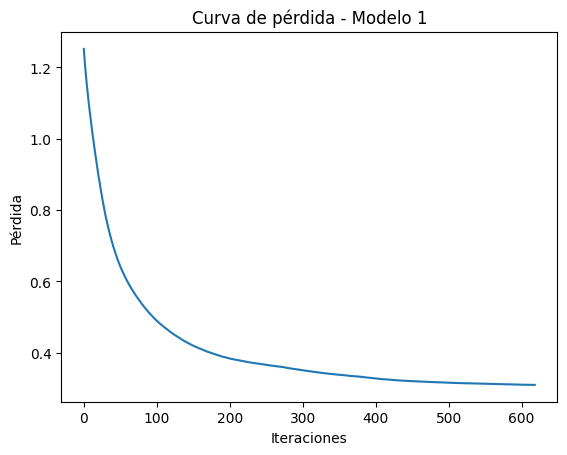

Iteration 1, loss = 1.59397764
Iteration 2, loss = 1.55428164
Iteration 3, loss = 1.51750985
Iteration 4, loss = 1.48418054
Iteration 5, loss = 1.45417873
Iteration 6, loss = 1.42633520
Iteration 7, loss = 1.40027285
Iteration 8, loss = 1.37615096
Iteration 9, loss = 1.35327378
Iteration 10, loss = 1.33114411
Iteration 11, loss = 1.31007595
Iteration 12, loss = 1.28977597
Iteration 13, loss = 1.26886043
Iteration 14, loss = 1.25005045
Iteration 15, loss = 1.23075507
Iteration 16, loss = 1.21295460
Iteration 17, loss = 1.19529387
Iteration 18, loss = 1.17907078
Iteration 19, loss = 1.16318332
Iteration 20, loss = 1.14864263
Iteration 21, loss = 1.13456588
Iteration 22, loss = 1.12166565
Iteration 23, loss = 1.10925926
Iteration 24, loss = 1.09731172
Iteration 25, loss = 1.08585319
Iteration 26, loss = 1.07505572
Iteration 27, loss = 1.06450856
Iteration 28, loss = 1.05439310
Iteration 29, loss = 1.04467629
Iteration 30, loss = 1.03524606
Iteration 31, loss = 1.02566644
Iteration 32, los

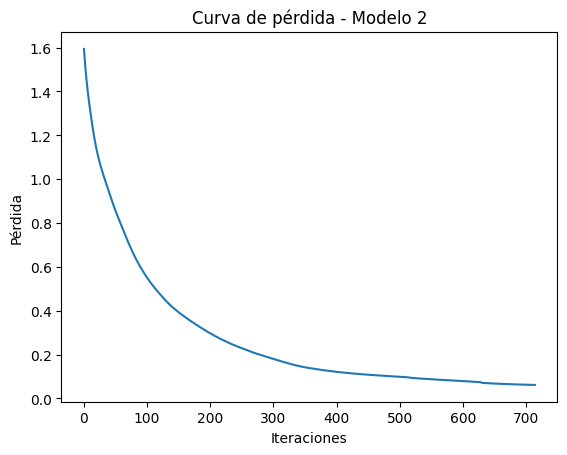

In [128]:
#modelo de redes neuronales
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#normalizacion de los datos
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#modelo 1
mlp = MLPClassifier(hidden_layer_sizes=(3,4), max_iter=1000, verbose=True, random_state=42)
mlp.fit(X_train, y_train)

plt.plot(mlp.loss_curve_)
plt.title("Curva de pérdida - Modelo 1")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()


#modelo 2
mlp2 = MLPClassifier(hidden_layer_sizes=(10,5,2), activation ='tanh', max_iter=1000, verbose=True, random_state=42)
mlp2.fit(X_train, y_train)

plt.plot(mlp2.loss_curve_)
plt.title("Curva de pérdida - Modelo 2")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()

### 4. Use los modelos para predecir el valor de la variable respuesta.

In [129]:
y_pred = mlp.predict(X_test)
y_pred2 = mlp2.predict(X_test)


### 5. Haga las matrices de confusión respectivas.

Modelo 1:
Accuracy entrenamiento modelo 1: 0.8738839285714286
Accuracy prueba modelo 1: 0.7422222222222222
Confusion Matrix:
 [[41  1 14]
 [ 0 67 22]
 [13  8 59]]
Classification Report:
               precision    recall  f1-score   support

    Economic       0.76      0.73      0.75        56
        High       0.88      0.75      0.81        89
Intermediate       0.62      0.74      0.67        80

    accuracy                           0.74       225
   macro avg       0.75      0.74      0.74       225
weighted avg       0.76      0.74      0.75       225



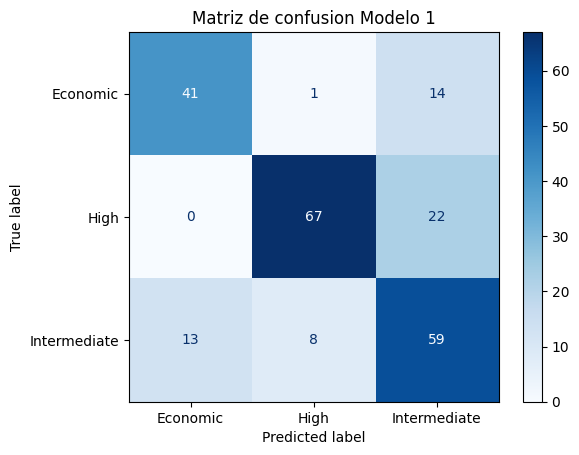

Modelo 2:
Accuracy entrenamiento modelo 2: 0.9910714285714286
Accuracy prueba modelo 2: 0.7555555555555555
Confusion Matrix:
 [[42  0 14]
 [ 1 73 15]
 [16  9 55]]
Classification Report:
               precision    recall  f1-score   support

    Economic       0.71      0.75      0.73        56
        High       0.89      0.82      0.85        89
Intermediate       0.65      0.69      0.67        80

    accuracy                           0.76       225
   macro avg       0.75      0.75      0.75       225
weighted avg       0.76      0.76      0.76       225



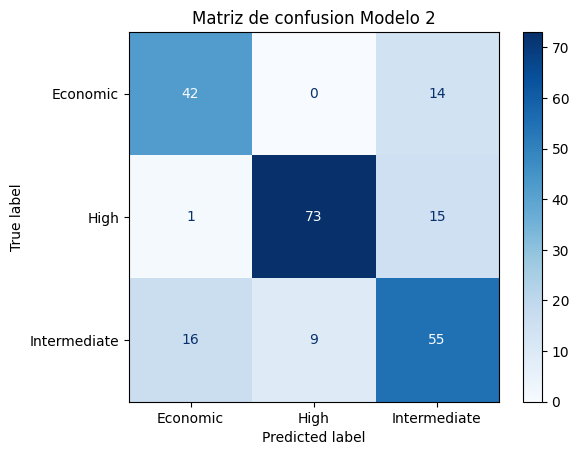

In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Modelo 1:")
print("Accuracy entrenamiento modelo 1:", accuracy_score(y_train, mlp.predict(X_train)))
print("Accuracy prueba modelo 1:", accuracy_score(y_test, mlp.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
#matrix de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de confusion Modelo 1")
plt.show()


print("Modelo 2:")
# print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Accuracy entrenamiento modelo 2:", accuracy_score(y_train, mlp2.predict(X_train)))
print("Accuracy prueba modelo 2:", accuracy_score(y_test, mlp2.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
#matrix de confusion 
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=mlp2.classes_)
disp2.plot(cmap='Blues')
plt.title("Matriz de confusion Modelo 2")
plt.show()





### 6. Compare los resultados obtenidos con los diferentes modelos de clasificación usando redes neuronales en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores).

In [131]:
import time

# para el primer modelo
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(3,4), max_iter=1000, verbose=True, random_state=42)
mlp.fit(X_train, y_train)
end_time = time.time()
training_time_model_1 = end_time - start_time

# para el segundo modelo
start_time = time.time()
mlp2 = MLPClassifier(hidden_layer_sizes=(10,5,2), activation ='tanh', max_iter=1000, verbose=True, random_state=42)
mlp2.fit(X_train, y_train)
end_time = time.time()
training_time_model_2 = end_time - start_time

print(f"Tiempo de entrenamiento del modelo 1: {training_time_model_1:.2f} segundos")
print(f"Tiempo de entrenamiento del modelo 2: {training_time_model_2:.2f} segundos")
# Comparar los tiempos de entrenamiento
if training_time_model_1 < training_time_model_2:
    print("El modelo 1 es más rápido.")
else:
    print("El modelo 2 es más rápido.")

Iteration 1, loss = 1.25199997
Iteration 2, loss = 1.22301153
Iteration 3, loss = 1.19747043
Iteration 4, loss = 1.17415947
Iteration 5, loss = 1.15327225
Iteration 6, loss = 1.13309002
Iteration 7, loss = 1.11360446
Iteration 8, loss = 1.09522959
Iteration 9, loss = 1.07823633
Iteration 10, loss = 1.06040915
Iteration 11, loss = 1.04371205
Iteration 12, loss = 1.02696098
Iteration 13, loss = 1.01187327
Iteration 14, loss = 0.99651223
Iteration 15, loss = 0.98149875
Iteration 16, loss = 0.96715612
Iteration 17, loss = 0.95287727
Iteration 18, loss = 0.93847896
Iteration 19, loss = 0.92450758
Iteration 20, loss = 0.91102775
Iteration 21, loss = 0.89744710
Iteration 22, loss = 0.88481569
Iteration 23, loss = 0.87235652
Iteration 24, loss = 0.85998300
Iteration 25, loss = 0.84776792
Iteration 26, loss = 0.83600122
Iteration 27, loss = 0.82420283
Iteration 28, loss = 0.81335478
Iteration 29, loss = 0.80233379
Iteration 30, loss = 0.79180760
Iteration 31, loss = 0.78190086
Iteration 32, los

En cuanto tiempo el modelo 1 es más rápido, tiene un accuracy en entrenamiento de 87.4% y 74.2% en prueba, mientras que su F1 promedio es de 0.75. Acerca del modelo 2 tiene un accuracy en entrenamiento de 99.1% y 75.6% en prueba, mientras que su F1 promedio es de 0.76. El modelo 2 al tener un accuracy de 99.1% muestra un gran sobreajuste. 
Ya en comparación acerca de los errores por clase, en la clase de economicos el del primer modelo tiene 1 error más, porque el modelo 2 no confunde con high. Ya en high, el m1 tiene 22 errores, mientras que el modelo 2 tiene 16. Y en intermedio, el modelo 1 tiene 21 y el modelo 2 tiene 25, siendo el modelo 1 mejor clasificando intermedio. El modelo 1 es más estable y generalizable, mientras que el modelo 2 parece tener sobreajuste y puede fallar con nuevos datos. 


### 7. Analice si no hay sobreajuste en los modelos

Iteration 1, loss = 1.14014500
Iteration 2, loss = 1.13965024
Iteration 3, loss = 1.13915630
Iteration 4, loss = 1.13866323
Iteration 5, loss = 1.13817102
Iteration 6, loss = 1.13767970
Iteration 7, loss = 1.13718928
Iteration 8, loss = 1.13669977
Iteration 9, loss = 1.13621120
Iteration 10, loss = 1.13572356
Iteration 11, loss = 1.13523687
Iteration 12, loss = 1.13475116
Iteration 13, loss = 1.13426643
Iteration 14, loss = 1.13378268
Iteration 15, loss = 1.13329995
Iteration 16, loss = 1.13281823
Iteration 17, loss = 1.13233753
Iteration 18, loss = 1.13185788
Iteration 19, loss = 1.13137927
Iteration 20, loss = 1.13090172
Iteration 21, loss = 1.13042523
Iteration 22, loss = 1.12994982
Iteration 23, loss = 1.12947550
Iteration 24, loss = 1.12900227
Iteration 25, loss = 1.12853013
Iteration 26, loss = 1.12805911
Iteration 27, loss = 1.12758920
Iteration 28, loss = 1.12712041
Iteration 29, loss = 1.12665274
Iteration 30, loss = 1.12618620
Iteration 31, loss = 1.12572081
Iteration 32, los

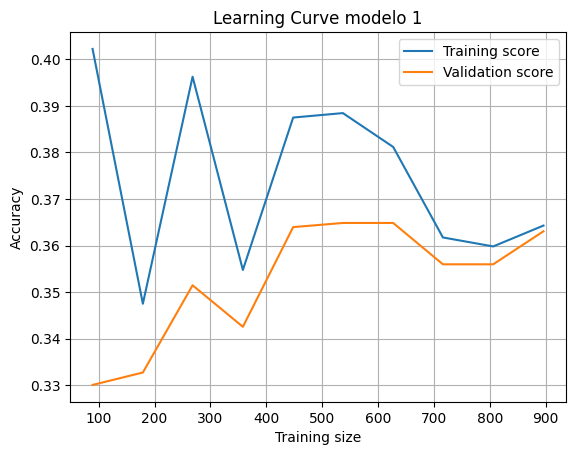

Iteration 1, loss = 2.23082255
Iteration 2, loss = 2.22181060
Iteration 3, loss = 2.21310858
Iteration 4, loss = 2.20067670
Iteration 5, loss = 2.19167457
Iteration 6, loss = 2.18402505
Iteration 7, loss = 2.17644391
Iteration 8, loss = 2.16827436
Iteration 9, loss = 2.16015503
Iteration 10, loss = 2.15257105
Iteration 11, loss = 2.14460571
Iteration 12, loss = 2.13648377
Iteration 13, loss = 2.12733824
Iteration 14, loss = 2.11786141
Iteration 15, loss = 2.10926968
Iteration 16, loss = 2.10054277
Iteration 17, loss = 2.09162617
Iteration 18, loss = 2.08257401
Iteration 19, loss = 2.07302882
Iteration 20, loss = 2.05987112
Iteration 21, loss = 2.05002978
Iteration 22, loss = 2.03567445
Iteration 23, loss = 2.01922891
Iteration 24, loss = 2.00841364
Iteration 25, loss = 1.99869234
Iteration 26, loss = 1.98615207
Iteration 27, loss = 1.97557127
Iteration 28, loss = 1.96412970
Iteration 29, loss = 1.95246660
Iteration 30, loss = 1.93728776
Iteration 31, loss = 1.91746120
Iteration 32, los

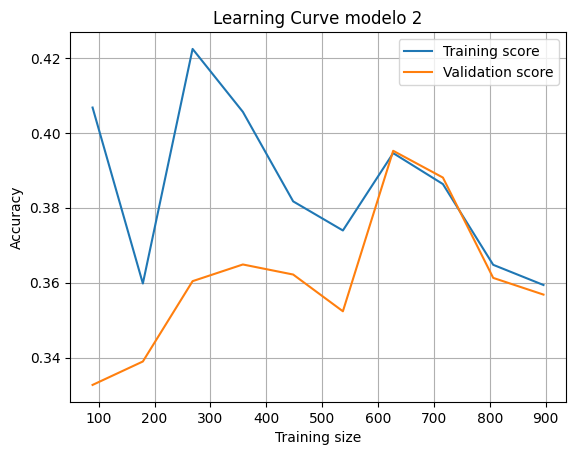

In [132]:
from sklearn.model_selection import learning_curve

# modelo 1
train_sizes, train_scores, test_scores = learning_curve(
    mlp, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning Curve modelo 1')
plt.legend()
plt.grid(True)
plt.show()


#modelo 2 
train_sizes, train_scores, test_scores = learning_curve(
    mlp2, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning Curve modelo 2')
plt.legend()
plt.grid(True)
plt.show()

Lo que se puede ver en ambas gráficas es el Learning Curve de los modelos. En donde la línea azul es el training score y la naranja es validation score. 
Lo que se ve en el primero es que comienza alto y pues luego disminuye gradualmente en el training score. Luego en el validation score inicia bajo y sube ligeramente, para luego estabilizarse. Sin embargo la precisión en validación es más baja que entrenamiento, eso sugiere sobreajuste. Lo que se observa es que el modelo aprende mejor los datos de entrenamiento mejor de lo que generaliza. Entonces, este modelo esta sobreajustado y no tiene un rendimiento muy alto en validación.

En el modelo 2, el training score empieza alto y baja progresivamente conforme se añaden datos. Mientras, acerca del validarion score, empieza abajo sube a 0.39 y baja, a comparación del gráfico anterior en este las curvas si convergen, entonces a comparación del modelo anterior bajo el sobreajuste, aunque la precisión no es miy alta

### 8. Para el modelo elegido de clasificación tunee los parámetros y discuta si puede mejorar todavía el modelo sin llegar a sobre ajustarlo

Fitting 5 folds for each of 18 candidates, totalling 90 fits

mejores hiperparametros encontrados:
{'mlp__activation': 'relu', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (20, 10)}

Accuracy en entrenamiento: 0.7366071428571429

Accuracy en test: 0.72

Matriz de Confusión:
 [[34  0 22]
 [ 0 78 11]
 [ 9 21 50]]

Reporte de Clasificación:
               precision    recall  f1-score   support

    Economic       0.79      0.61      0.69        56
        High       0.79      0.88      0.83        89
Intermediate       0.60      0.62      0.61        80

    accuracy                           0.72       225
   macro avg       0.73      0.70      0.71       225
weighted avg       0.72      0.72      0.72       225



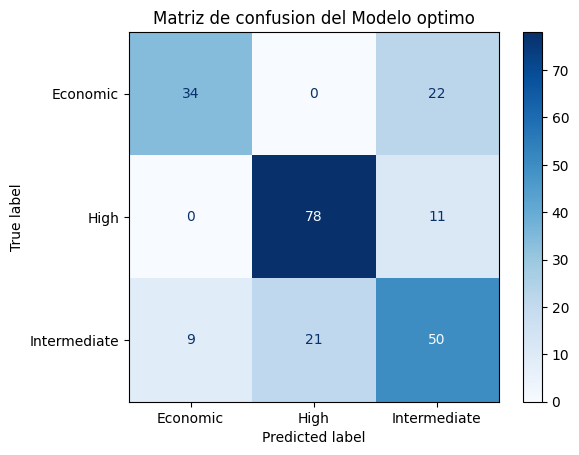

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# Codificar etiquetas 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # y debe contener las clases: 'High', 'Intermediate', 'Economic'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
])

#hiperparametros a buscar
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (20, 10), (30, 20, 10)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


print("\nmejores hiperparametros encontrados:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print("\nAccuracy en entrenamiento:", accuracy_score(y_train, best_model.predict(X_train)))
print("\nAccuracy en test:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_labels, y_pred_labels))
print("\nReporte de Clasificación:\n", classification_report(y_test_labels, y_pred_labels))

cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de confusion del Modelo optimo")
plt.show()


La matriz de confusión del modelo óptimo, se puede norar que definitivamanete tuvo menos errores al clasificar las casas economicas y caras. Sin embargo, al clasificar las intermedias sigue teniendo problemas.